In [ ]:
import gym
from gym.wrappers import AtariPreprocessing, FrameStack
import matplotlib.pyplot as plt
from agent import Agent
from PIL import Image
import torch
import random

env = gym.make("ALE/Breakout-v5", frameskip=1)
env = AtariPreprocessing(env, frame_skip=4)
env = FrameStack(env, 4)
agent = Agent(env, buffer_size=1000) # change this?
agent.train(50) # change this?
# or: load weights of a saved model

In [ ]:
frames = []
state = agent.env.reset()
rgb_array = agent.env.render(mode="rgb_array")
image = Image.fromarray(rgb_array)

for i in range(1):
    done = False
    state = agent.env.reset()
    counter = 0
    for step in range(500):
        q_values = agent.Q(torch.Tensor(state).unsqueeze(0))
        if random.random() < 0.1:  # epsilon-random policy
                action = agent.env.action_space.sample()
        else:
                action = torch.argmax(q_values)
        next_state, reward, done, info = agent.env.step(action)
        rgb_array = agent.env.render(
            mode="rgb_array"
        )
        frame = Image.fromarray(rgb_array)
        frames.append(frame)
        state = next_state
        counter += 1
        if done or (agent.env.ale.lives() == 0):
            print(f"Episode finished after {counter} timesteps")
            break
env.close()

image.save('clip.gif',
           save_all=True, append_images=frames,
           optimize=False, loop=0)


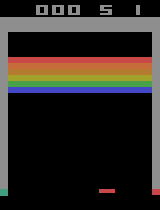

In [23]:
# pip install git+https://github.com/tensorflow/docs

import tensorflow_docs.vis.embed as embed
embed.embed_file('clip.gif')